# MNIST-Fashion

In [4]:
#benötigte imports
import tensorflow as tf
import numpy as np
import os
from tensorflow.python.eager import context
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import plot_model

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import visualkeras

# Einfaches Modell erstellen

def createModel():
    # Eingabe-layer
    model = tf.keras.models.Sequential()
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # 1. Hidden-layer
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # 2. Hidden-layer
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # Ausgabe-layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.Activation('elu'))
    #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))

    return model
model = createModel()
model.summary()
from keras_visualizer import visualizer


visualizer(model, file_format='png')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

ValueError: The layer conv2d has never been called and thus has no defined input.

In [2]:
# parallelization Einstellungen
_ = tf.Variable([1])
context._context = None
context._create_context()
num_threads = os.cpu_count()
tf.config.threading.set_inter_op_parallelism_threads(num_threads)
tf.config.threading.set_intra_op_parallelism_threads(num_threads)

In [3]:
# Daten herrunterladen
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [4]:
# Daten laden
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Normalisiere die Daten
x_train = x_train / 255.0
x_test = x_test / 255.0

# Dataset erstellen
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).repeat()  # .repeat() hinzufuegen

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

### Define the model

Standardard convolutional-network mit 3 layers mit drop-out and batch normalization zwischen den Schichten.

In [5]:
# erstellen des Modells
def createModel():
    # Eingabe-layer
    model = tf.keras.models.Sequential()
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # 1. Hidden-layer
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # 2. Hidden-layer
    #model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.25))
    
    # Ausgabe-layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.Activation('elu'))
    #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))

    return model
model = createModel()
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])
import visualkeras


visualkeras.layered_view(model, legend=True, draw_volume=False)


AttributeError: 'Conv2D' object has no attribute 'output_shape'

In [6]:


import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras import models


from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
#from keras_visualizer import visualizer
from keras import layers 



model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.summary()





import visualkeras
visualkeras.layered_view(model, legend=True, draw_volume=False)



/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,336 (524.75 KB)

 Trainable params: 134,336 (524.75 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: 'Conv2D' object has no attribute 'output_shape'

# Training des Modells

In [12]:
# Konfiguration für die Verwendung von CPU oder GPU 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Spezielle GPU-Konfigurationen können hier vorgenommen werden, falls erforderlich
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
        strategy = tf.distribute.MirroredStrategy()  # Strategie für mehrere GPUs
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU")
   
    strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
    
with strategy.scope():
  model = createModel()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])
"""
model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=17,
    steps_per_epoch=60,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    validation_freq=17
)
"""
steps_per_epoch = len(x_train) // batch_size
model.fit(
train_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=len(x_test) // batch_size,
    validation_freq=17
)

model.save_weights('.weights.h5', overwrite=True)


No GPU found, using CPU
Epoch 1/20


2024-06-02 14:37:39.754806: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 570s 300ms/step - loss: 0.6234 - sparse_categorical_accuracy: 0.8032
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 460s 245ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.8886
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 446s 238ms/step - loss: 0.2589 - sparse_categorical_accuracy: 0.9044
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 424s 226ms/step - loss: 0.2160 - sparse_categorical_accuracy: 0.9201
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 431s 230ms/step - loss: 0.1822 - sparse_categorical_accuracy: 0.9343
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 418s 223ms/step - loss: 0.1570 - sparse_categorical_accuracy: 0.9429
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 402s 215ms/step - loss: 0.1276 - sparse_categorical_accuracy: 0.9527
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 366s 195ms/step - loss: 0.1071 - sparse_categorical_accuracy: 0.9602
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 425s 227ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9658
Epoch 10/20


2024-06-02 16:45:48.222535: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 418s 223ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.6162 - val_sparse_categorical_accuracy: 0.9091
Epoch 18/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 369s 197ms/step - loss: 0.0545 - sparse_categorical_accuracy: 0.9831
Epoch 19/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 369s 197ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9846
Epoch 20/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 467s 249ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9882


# Plotten einiger Vorhersagen des trainierten Modells

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


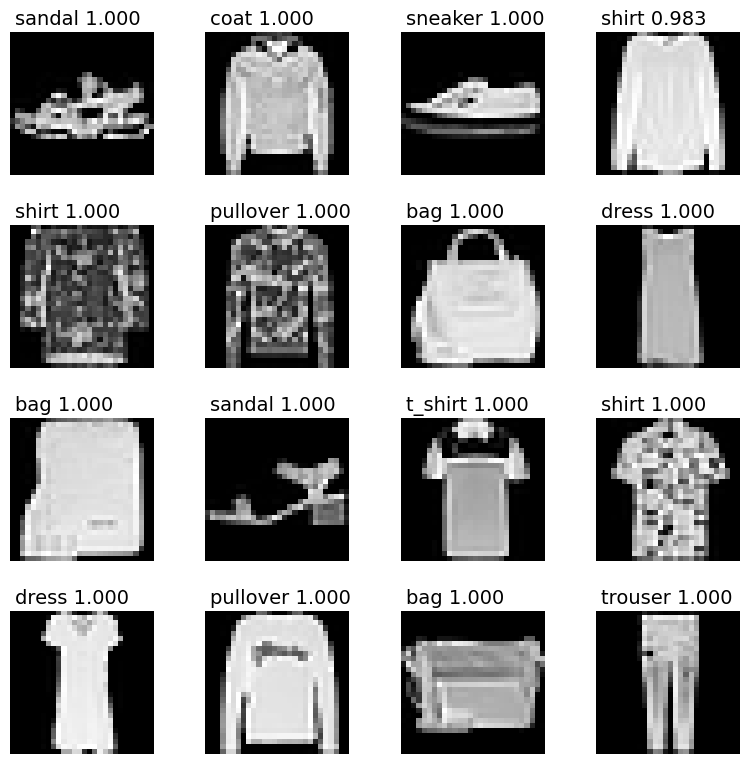

In [13]:
from tensorflow.keras.models import load_model
import visualkeras



model.save('trained_model2.h5')
trained_model = load_model('trained_model1.h5')
#visualkeras.layered_view(trained_model).show()


LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

plot_model(trained_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = plt.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i], cmap='gray')
    axes[x, y].text(0.5, -2.0, label + ' %.3f ' % confidence, fontsize=14)

  plt.gcf().set_size_inches(8, 8)
  plt.tight_layout(pad=2.0)


x_predict = np.array([x_test[i] for i in random.sample(range(len(x_test)), 16) ]) 

plot_predictions(np.squeeze(x_predict), trained_model.predict(x_predict))

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


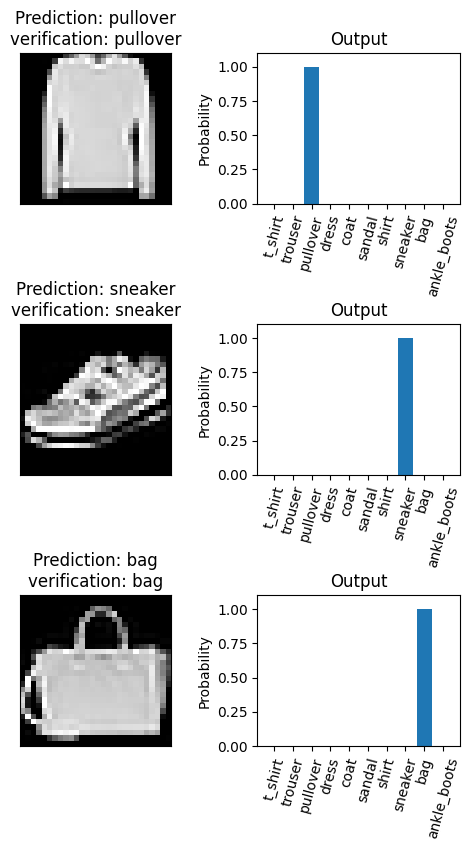

In [10]:
import random
def predictAndPlotAndShowOutput(x_predics, predictions, y_plt):
    
    fig, ax = plt.subplots(3, 2, figsize=(6, 9))
    for j in range(3):
        vorhersage = LABEL_NAMES[np.argmax(predictions[j])]
        confidence = np.max(predictions[j])
        ax[j, 0].imshow(x_predics[j], cmap='gray', interpolation='none')
        ax[j, 0].set_title("Prediction: "+str(vorhersage)+ "\nverification: " + LABEL_NAMES[y_plt[j]])
        ax[j, 0].axes.get_xaxis().set_visible(False)
        ax[j, 0].axes.get_yaxis().set_visible(False)
        ax[j, 1].bar(np.arange(10), predictions[j])
        ax[j, 1].set_ylabel("Probability")
        ax[j, 1].set_ylim(0,1.1)
        ax[j, 1].set_title("Output")
        ax[j, 1].set_xticks(np.arange(10))
        ax[j, 1].set_xticklabels(LABEL_NAMES, rotation=75)
    plt.subplots_adjust(hspace=0.8, wspace = 0.3)

plot_samples = random.sample(range(1, len(x_test) + 1), 3)
x_plt = np.array([x_test[i] for i in plot_samples])
y_plt = np.array([y_test[i] for i in plot_samples])

predictAndPlotAndShowOutput(np.squeeze(x_plt), trained_model.predict(x_plt), y_plt)

In [18]:
import matplotlib.pyplot as plt
conv_layer_indices = [0, 1, 2]
# Lade ein Testbeispiel (z.B. x_test[0])
test_example = x_test[0]

# Erstelle ein neues Modell, das die Zwischenergebnisse der ausgewählten Schichten ausgibt
conv_layers = [layer for layer in trained_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
print(len(conv_layers))
layer_outputs = [conv_layers[i].output for i in conv_layer_indices]
activation_model = tf.keras.models.Model(inputs=trained_model.input, outputs=layer_outputs)

# Nutze das Testbeispiel, um die Zwischenergebnisse zu erhalten
activations = activation_model.predict(np.expand_dims(test_example, axis=0))
plt.imshow(x_test[0], cmap='gray')
# Plotte die Zwischenergebnisse
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 10))
    num_filters = activation.shape[3]  # Anzahl der Filter für diesen Convolutional Layer
    num_plots = min(num_filters, 64)  # Höchstens 64 Plots
    for j in range(num_plots):
        plt.subplot(8, 8, j+1)
        plt.imshow(activation[0, :, :, j], cmap='gray')
        plt.axis('off')
    plt.show()


3


ValueError: The layer sequential_4 has never been called and thus has no defined input.